<h1> Buổi 01 bài 02

<h3>Import các thu viện numpy, pandas, matplotlib và seaborn

In [182]:
# Linear algebra
import numpy as np
# Data processing
import pandas as pd
# Data vissualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

<p>Đọc dữ liệu đầu vào

In [227]:
with open("E:\\IS252\\Lab1\\bank_marketting.csv") as f:
    df = pd.read_csv(f)

<p>Xem xét dữ liệu ban đầu với hàm head() và info()

In [228]:
df.head(12)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  y          11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


<p>Thống kê chỉ số của các thuộc tính định lượng như: đếm số giá trị, giá trị lớn nhất, giá trị nhỏ nhất, trung bình, độ lệch chuẩn, tứ phân vị

In [230]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


<h3>Lấy ra 5 thuộc tính có số lượng giá trị rộng nhiều nhất

In [231]:
total = df.isnull().sum().sort_values(ascending=False) #Tìm trong dữ liệu giá null, tính tổng chúng lại, sắp xếp theo tăng dần  = False tức là sắp giảm
percent_1=df.isnull().sum()/df.isnull().count()*100 #Tổng giá trị null của một cột/ số dòng của cột null đó 
percent_2 = (round(percent_1,1)).sort_values(ascending = False) #Làm tròn 1 chữ số và sort giảm dần
missing_data = pd.concat([total,percent_2],axis=1,keys=['Total','%'])
missing_data.head(5)

,Total,%
age,0,0.0
day,0,0.0
poutcome,0,0.0
previous,0,0.0
pdays,0,0.0


<h3>Vẽ biểu đồ khảo sát liên quan giữa thuộc tính tuổi (age), có nhà (housing) - cho vay loan (loan)

In [232]:
df.head(12)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


C:\Users\phuon\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


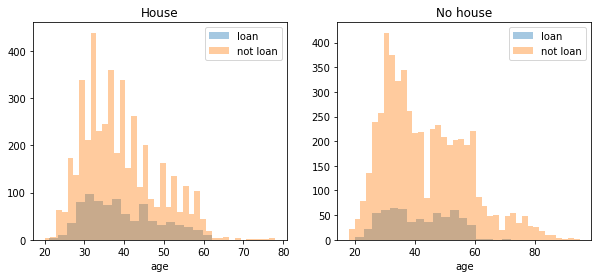

In [233]:
loan = 'loan'
not_loan ='not loan'
fig, axes = plt.subplots(nrows = 1,ncols =2,figsize = (10,4))
house = df[df['housing']=='yes']
no_house = df[df['housing']=='no']
ax = sns.distplot(house[house['loan']=="yes"].age.dropna(), bins = 18,label =loan, ax =axes[0],kde = False)
ax = sns.distplot(house[house['loan']=="no"].age.dropna(), bins = 40,label =not_loan, ax =axes[0],kde = False)
ax.legend()
ax.set_title('House')
ax = sns.distplot(no_house[no_house['loan']=="yes"].age.dropna(), bins = 18,label =loan, ax =axes[1],kde = False)
ax = sns.distplot(no_house[no_house['loan']=="no"].age.dropna(), bins = 40,label =not_loan, ax =axes[1],kde = False)
ax.legend()
_=ax.set_title('No house')

<p>Từ biểu đồ trên có thể rút ra vài nhận xét như sau:
<ul>
<li>Xác suất không cho vay mua nhà thì không có khoản vay cá nhân cao nhất tại các độ tuổi khoagr 35, 39 và 46.
<li>Cơ hội có cho vay mua nahf thì sẽ có khoản vay cá nhân cao nhất trong khoảng từ hơn 40 đến 55 tuổi.
<li>Xác suất có cho vay mua nhà và không có khoảng vay cá nhân cao nhất tầm 31 tuổi.
<li>Nhìn chung tỷ lệ không có khoản vay cá nhân của cho vay mua nhà sẽ có nhiều biến động hơn so với không cho vay mua nhà.
</ul>


Tập dữ liệu không có giá trị rỗng

<h3>Tiền xử lý dữ liệu

<p>Xét thuộc tính contact

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  y          11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


<p>Thuộc tính balance, housing, campaign, previous, day, month, pdays, contact không cần thiết nên ta xóa đi

<p>Xóa các thuộc tính không cần thiết

In [235]:
df = df.drop(["contact"], axis=1)
df = df.drop(["balance"], axis=1)
df = df.drop(["housing"], axis=1)
df = df.drop(["campaign"], axis=1)
df = df.drop(["previous"], axis=1)
df = df.drop(["day"], axis=1)
df = df.drop(["month"], axis=1)
df = df.drop(["pdays"], axis=1)

In [236]:
df.head(12)

,age,job,marital,education,default,loan,duration,poutcome,y
0,59,admin.,married,secondary,no,no,1042,unknown,yes
1,56,admin.,married,secondary,no,no,1467,unknown,yes
2,41,technician,married,secondary,no,no,1389,unknown,yes
3,55,services,married,secondary,no,no,579,unknown,yes
4,54,admin.,married,tertiary,no,no,673,unknown,yes
5,42,management,single,tertiary,no,yes,562,unknown,yes
6,56,management,married,tertiary,no,yes,1201,unknown,yes
7,60,retired,divorced,secondary,no,no,1030,unknown,yes
8,37,technician,married,secondary,no,no,608,unknown,yes
9,28,services,single,secondary,no,no,1297,unknown,yes


<p>Dữ liệu poutcome có chứ nhiều giá trị Unknown nên xóa đi

In [237]:
df["poutcome"].describe()

count       11162
unique          4
top       unknown
freq         8326
Name: poutcome, dtype: object

In [238]:
df = df.drop(["poutcome"], axis=1)

In [239]:
df.head(12)

,age,job,marital,education,default,loan,duration,y
0,59,admin.,married,secondary,no,no,1042,yes
1,56,admin.,married,secondary,no,no,1467,yes
2,41,technician,married,secondary,no,no,1389,yes
3,55,services,married,secondary,no,no,579,yes
4,54,admin.,married,tertiary,no,no,673,yes
5,42,management,single,tertiary,no,yes,562,yes
6,56,management,married,tertiary,no,yes,1201,yes
7,60,retired,divorced,secondary,no,no,1030,yes
8,37,technician,married,secondary,no,no,608,yes
9,28,services,single,secondary,no,no,1297,yes


<p>Kiểm tra các thuộc tính số

In [240]:
print("Duration: ",df['duration'].isnull().sum())
print("Age: ",df['age'].isnull().sum())

Duration:  0
Age:  0


<h3>Xem lại các thuộc tính

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   loan       11162 non-null  object
 6   duration   11162 non-null  int64 
 7   y          11162 non-null  object
dtypes: int64(2), object(6)
memory usage: 697.8+ KB


Có thể thấy, các thuộc tính y, education, loan, job, marital, default có thể đổi về giá trị số.

<p>Biểu diễn thuộc tính y thành các giá trị 0 (no: không có đăng ký gửi có kỳ hạn), 1 (yes: có đăng ký gửi có kỳ hạn)
<p>Biểu diễn thuộc tính loan thành các giá trị 0 (no: không có nợ cá nhân), 1 (yes: có vay cá nhân)
<p>Biểu diễn thuộc tính default thành các giá trị 0 (no: không có nợ tín dụng), 1 (yes: có nợ tín dụng)

In [242]:
ys ={"no":0,"yes":1}
loans ={"no":0,"yes":1}
defaults ={"no":0,"yes":1}

for dataset in [df]:
    dataset['y']=dataset['y'].map(ys)
    dataset['loan']=dataset['loan'].map(loans)
    dataset['default']=dataset['default'].map(defaults)

<p>Chuyển đổi thuộc tính education thành số

In [243]:
educations = {"unknown":0,"primary":1,"secondary":2,"tertiary":3}

for dataset in [df]:
    dataset['education']= dataset['education'].map(educations)

<p>Chuyển đổi thuộc tính job thành số

In [244]:
jobs = {"unknown":0,"admin.":1,"unemployed":2,"management":3,"housemaid":4,"entrepreneur":5,"student":6, "blue-collar":7,"self-employed":8,"retired":9,"technician":10,"services":11}

for dataset in [df]:
    dataset['job']= dataset['job'].map(jobs)

<p>Chuyển đổi thuộc tính marital thành số

In [245]:
maritals = {"married":1,"divorced":2,"single":3}

for dataset in [df]:
    dataset['marital']= dataset['marital'].map(maritals)

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        11162 non-null  int64
 1   job        11162 non-null  int64
 2   marital    11162 non-null  int64
 3   education  11162 non-null  int64
 4   default    11162 non-null  int64
 5   loan       11162 non-null  int64
 6   duration   11162 non-null  int64
 7   y          11162 non-null  int64
dtypes: int64(8)
memory usage: 697.8 KB


In [247]:
df.head(12)

,age,job,marital,education,default,loan,duration,y
0,59,1,1,2,0,0,1042,1
1,56,1,1,2,0,0,1467,1
2,41,10,1,2,0,0,1389,1
3,55,11,1,2,0,0,579,1
4,54,1,1,3,0,0,673,1
5,42,3,3,3,0,1,562,1
6,56,3,1,3,0,1,1201,1
7,60,9,2,2,0,0,1030,1
8,37,10,1,2,0,0,608,1
9,28,11,3,2,0,0,1297,1


<p>Chia thuộc tính age thành 8 nhóm, sao cho số phần tử trong nhóm cân bằng. 
<ul>
    <li>Nhóm 1: dưới 30 tuổi
    <li>Nhóm 2: trên 30 tuổi đến 40 tuổi
    <li>Nhóm 3: trên 40 tuổi đến 50 tuổi
    <li>Nhóm 4: trên 50 tuổi đến 60 tuổi
    <li>Nhóm 5: trên 60 tuổi đến 70 tuổi
    <li>Nhóm 6: trên 70 tuổi đến 80 tuổi
    <li>Nhóm 7: trên 80 tuổi đến 90 tuổi
    <li>Nhóm 8: trên 90 tuổi 
</ul>

In [248]:
for dataset in [df]:
    dataset['age']=dataset['age'].astype(int)
    dataset.loc[dataset['age']<30,'age']=0
    dataset.loc[(dataset['age']>=30) & (dataset['age']<40),'age']=1
    dataset.loc[(dataset['age']>=40) & (dataset['age']<50),'age']=2
    dataset.loc[(dataset['age']>=50) & (dataset['age']<60),'age']=3
    dataset.loc[(dataset['age']>=60) & (dataset['age']<70),'age']=4
    dataset.loc[(dataset['age']>=70) & (dataset['age']<80),'age']=5
    dataset.loc[(dataset['age']>=80) & (dataset['age']<90),'age']=6
    dataset.loc[(dataset['age']>=90),'age']=7

<p>Kiểm tra kết quả đạt được

In [249]:
df['age'].value_counts()

1    4318
2    2628
3    1885
0    1551
4     484
5     224
6      65
7       7
Name: age, dtype: int64

<p>Chia thuộc tính duration thành 7 nhóm, sao cho số phần tử trong nhóm cân bằng. 
<ul>
    <li>Nhóm 1: dưới 500 
    <li>Nhóm 2: từ 500 đến dưới 1000
    <li>Nhóm 3: từ 1000 đến dưới 1500
    <li>Nhóm 4: từ 1500 đến dưới 2000
    <li>Nhóm 5: từ 2000 đến dưới 2500
    <li>Nhóm 6: từ 2500 đến dưới 3000
    <li>Nhóm 7: từ 3000 đến dưới 3500
    <li>Nhóm 8: từ 3500 trở đi
</ul>

In [250]:
for dataset in [df]:
    dataset.loc[dataset['duration']<500,'duration']=0
    dataset.loc[(dataset['duration']>=500) & (dataset['duration']<1000),'duration']=1
    dataset.loc[(dataset['duration']>=1000) & (dataset['duration']<1500),'duration']=2
    dataset.loc[(dataset['duration']>=1500) & (dataset['duration']<2000),'duration']=3
    dataset.loc[(dataset['duration']>=2000) & (dataset['duration']<2500),'duration']=4
    dataset.loc[(dataset['duration']>=2500) & (dataset['duration']<3000),'duration']=5
    dataset.loc[(dataset['duration']>=3000) & (dataset['duration']<3500),'duration']=5
    dataset.loc[(dataset['duration']>=3500),'duration']=6
    dataset['duration']=dataset['duration'].astype(int)

<p>Kiểm tra kết quả đạt được

In [251]:
df['duration'].value_counts()

0    8389
1    2066
2     557
3     117
4      19
5      13
6       1
Name: duration, dtype: int64

<h3>Kiểm tra lại dữ liệu

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        11162 non-null  int32
 1   job        11162 non-null  int64
 2   marital    11162 non-null  int64
 3   education  11162 non-null  int64
 4   default    11162 non-null  int64
 5   loan       11162 non-null  int64
 6   duration   11162 non-null  int32
 7   y          11162 non-null  int64
dtypes: int32(2), int64(6)
memory usage: 610.5 KB


In [253]:
df.head(12)

,age,job,marital,education,default,loan,duration,y
0,3,1,1,2,0,0,2,1
1,3,1,1,2,0,0,2,1
2,2,10,1,2,0,0,2,1
3,3,11,1,2,0,0,1,1
4,3,1,1,3,0,0,1,1
5,2,3,3,3,0,1,1,1
6,3,3,1,3,0,1,2,1
7,4,9,2,2,0,0,2,1
8,1,10,1,2,0,0,1,1
9,0,11,3,2,0,0,2,1


<h3>Vẽ biểu đồ khảo sát mối liên quan giữa thuộc tính tình trạng hôn nhân(marital) với có khoản vay cá nhân (loan), có thẻ tín dụng và khả năng đăng ký gửi có kỳ hạn (y)

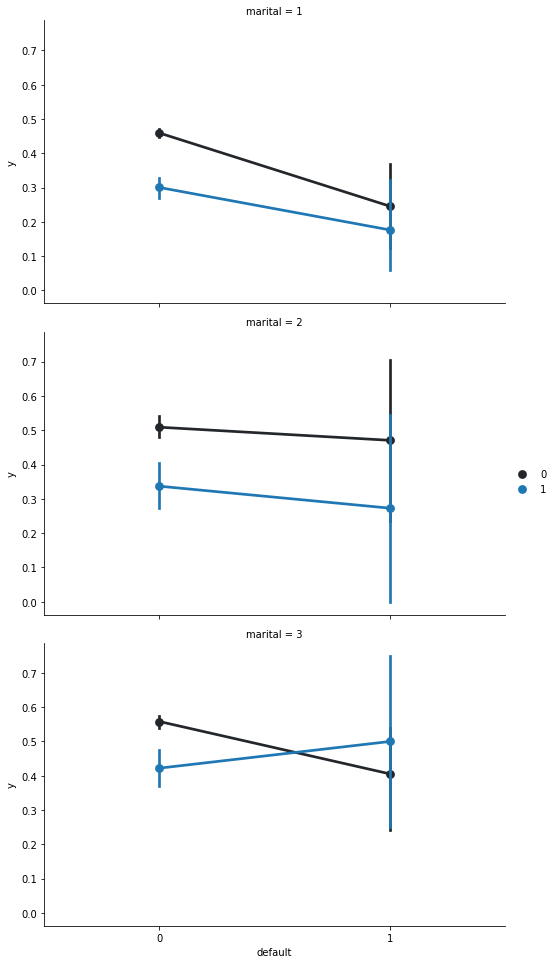

In [256]:
FacetGrid = sns.FacetGrid(df,row='marital',height =4.5, aspect =1.6)
FacetGrid.map(sns.pointplot,'default','y', 'loan', palette = None, order =None, hue_order = None)
FacetGrid.add_legend()

<p>Từ biểu đồ trên có thể thấy được, có mối liên quan chặt chẽ giữa thẻ tín dụng và khả năng đăng ký gửi có kỳ hạn.
<p>Tỷ số người có khoản vay cá nhân tại các tình trạng hôn nhân và không có thẻ tín dụng thường cao hơn so với những người có khoản vay cá nhân
<p>Điều này cũng xảy ra đối với tình trạng hôn nhân số 1 và số 2 nhưng ngược lại, với tình trạng hôn nhân số 3, lượng người có khoản vay cá nhân và có thẻ tín dụng sẽ cao hơn khi không có khoản vay cá nhân

<AxesSubplot:xlabel='marital', ylabel='y'>

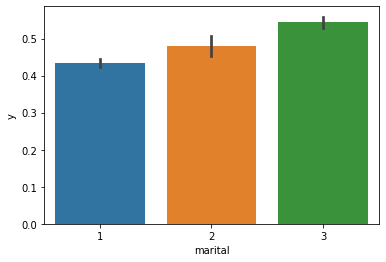

In [255]:
sns.barplot(x='marital',y='y',data=df)

Tuy nhiên, mối tương quan giữa khả năng đăng ký gửi có kỳ hạn với tình trạng hôn nhân. Và với tình trạng hôn nhân số 3 sẽ ảnh hưởng lớn nhất đối với thuộc tính y

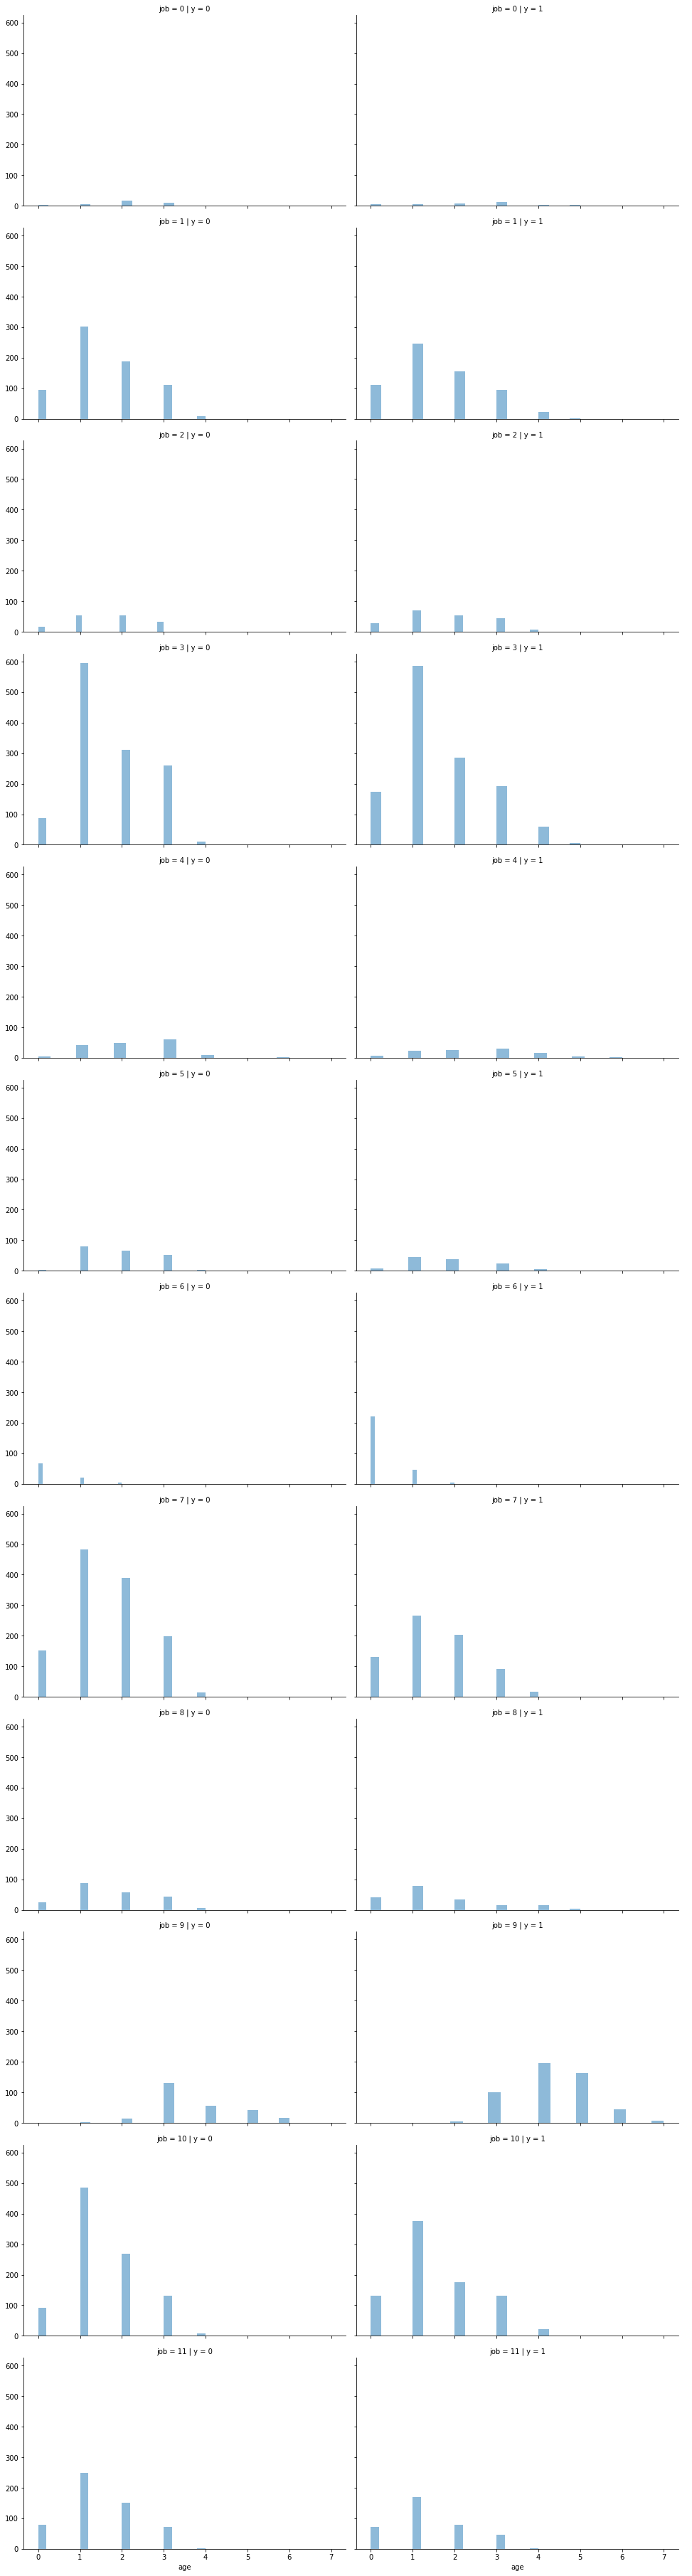

In [259]:
grid = sns.FacetGrid(df,col='y',row = 'job', height =4.2,aspect=1.6)
grid.map(plt.hist,'age',alpha=.5,bins=20)
grid.add_legend()

<p> Từ đồ thị trên có thể xác nhận nhận định rằng với nghề nghiệp loại 3 sẽ có tỷ lệ khả năng đăng ký gửi có thời hạn lớn

<h3>Thống kê trình độ học vấn (education), khoảng thời gian thực hiện chiến dịch (duration) và khảo sát sự liên quan với thuộc tính quyết định (y) và đưa ra nhận xét

C:\Users\phuon\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


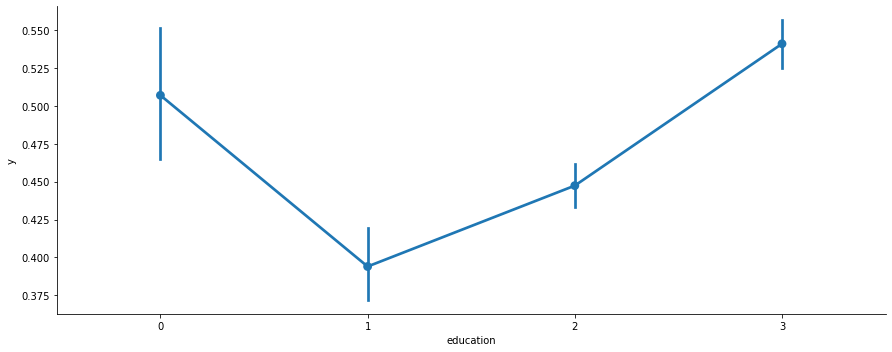

In [260]:
axes = sns.catplot('education','y',data=df,aspect=2.5,kind='point',)

<p>Sơ đồ trên cho ta thấy, lượng người có khả năng đăng ký gửi có kỳ hạn thường sẽ có tỷ lệ cao đối với nhóm học vấn số 0 và số 3. Những người có tỷ lệ học vấn thuộc nhóm 1 sẽ có khả năng thất nhất.


C:\Users\phuon\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


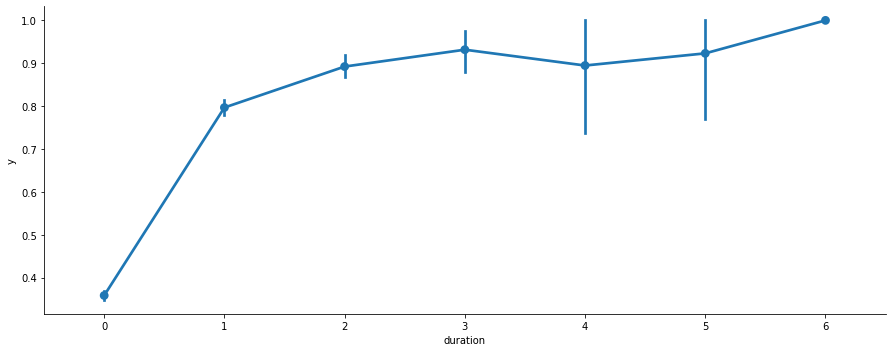

In [261]:
axes = sns.catplot('duration','y',data=df,aspect=2.5,kind='point',)

<p>Sơ đồ trên cho ta thấy, lượng người có khả năng đăng ký gửi có kỳ hạn thường càng cao khi khoảng thời gian thực hiện chiến dịch càng lâu.


<h3>Tạo thuộc tính mới

<h4>Tạo thuộc tính age * education: là tích của tuổi và trình độ học vấn

In [262]:
for dataset in [df]:
    dataset['age_class']= dataset['age']*dataset['education']

<h4>Tạo thuộc tính bảng cân đối kế toán theo ngày (duration_per_age): là khoảng thời gian thực hiện chiến dịch chia cho nhóm độ tuổi. 

In [263]:
for dataset in [df]:
    dataset['duration_per_age']= dataset['duration']/(dataset['age']+1)
    dataset['duration_per_age']= dataset['duration_per_age'].astype(int)
df.head(10)

,age,job,marital,education,default,loan,duration,y,age_class,duration_per_age
0,3,1,1,2,0,0,2,1,6,0
1,3,1,1,2,0,0,2,1,6,0
2,2,10,1,2,0,0,2,1,4,0
3,3,11,1,2,0,0,1,1,6,0
4,3,1,1,3,0,0,1,1,9,0
5,2,3,3,3,0,1,1,1,6,0
6,3,3,1,3,0,1,2,1,9,0
7,4,9,2,2,0,0,2,1,8,0
8,1,10,1,2,0,0,1,1,2,0
9,0,11,3,2,0,0,2,1,0,2
